In [1]:
import numpy as np
from matplotlib import pyplot as plt
import numpy.linalg as la
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
%%javascript
require("notebook/js/notebook").Notebook.prototype.scroll_to_bottom = function () {}

<IPython.core.display.Javascript object>

In [3]:
input = np.load('input.npy')
output = np.load('output.npy')

# Problem 1
## Problem 1.1

In [4]:
bad_train_x = input[input < 0]
bad_train_y = output[input < 0]
bad_test_x = input[input > 0]
bad_test_y = output[input > 0]

In [5]:
# Part (i)
linear_model = LinearRegression(copy_X=True)
linear_fit = linear_model.fit(bad_train_x.reshape((-1, 1)), bad_train_y)
a = linear_fit.coef_
b = linear_fit.intercept_
a, b

(array([-0.01043025]), 2.587127168868936)

0.0330221626435983

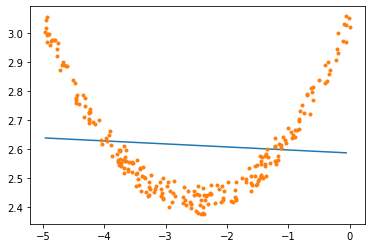

In [6]:

plot_x = np.arange(bad_train_x.min(), bad_train_x.max(), 0.1)
plot_y = a*plot_x + b
y_pred = linear_model.predict(bad_train_x.reshape((-1,1)))
plt.plot(plot_x, plot_y)                # Plots line
plt.plot(bad_train_x, bad_train_y, '.') # Plots training points
mean_squared_error(y_pred, bad_train_y) # Mean squared error of Linear fit on training data

### Answer to (i):
Our line fits the training data well for a linear fit (as well as a linear one can do anyways). Our training loss for mean squared error (MSE) is 0.033 which is not too shabby.

8.832697367127995

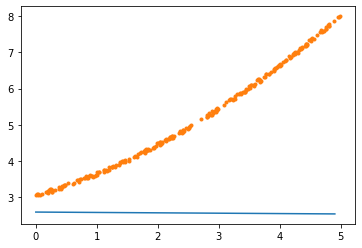

In [7]:
# Part (ii)
plot_x = np.arange(bad_test_x.min(), bad_test_x.max(), 0.1)
plot_y = a*plot_x + b
plt.plot(plot_x, plot_y)
plt.plot(bad_test_x, bad_test_y, '.')
y_pred = linear_model.predict(bad_test_x.reshape((-1,1)))
mean_squared_error(y_pred, bad_test_y)

### Answer (ii):
Our line completely messes up on the test data. The test loss has an MSE of 8.833 which is really bad. 

In [8]:
# Part (iii)
splitting = train_test_split(input, output)
train_x = splitting[0]
train_y = splitting[2]
test_x = splitting[1]
test_y = splitting[3]

0.5129879287392638

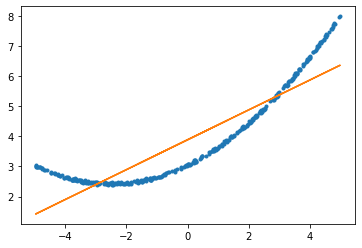

In [9]:
linear_model_random = LinearRegression()
linear_model_random.fit(train_x.reshape((-1,1)), train_y)

y_pred = linear_model_random.predict(train_x.reshape((-1,1)))
plt.plot(train_x, train_y, ".")
plt.plot(train_x, y_pred)
mean_squared_error(y_pred, train_y)

0.5998706301599327

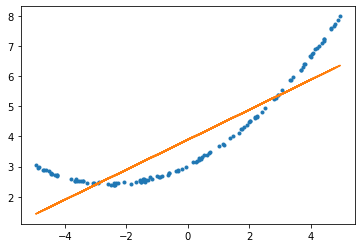

In [10]:
y_pred = linear_model_random.predict(test_x.reshape((-1,1)))
plt.plot(test_x, test_y, ".")
plt.plot(test_x, y_pred)
mean_squared_error(y_pred, test_y)

### Answer (iii):
Yes the line fits better as now we can see that the MSE is much closer to the same as the training one (which means we correctly sampled the same distribution as our testing set). For my example, I had training MSE around 0.559 and test MSE at 0.465. In this case, the line fits the test_x better, but I think that'sjust because it is more likely to sample in the middle of the curve which is where the values are closer to the line.

## Problem 1.2 Kernals-I

In [11]:
# Part (i)
def phi(x):
    return np.array([x**2, x]).T

0.0008277781029622108

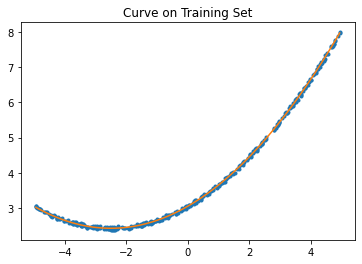

In [12]:
# Part (ii)
tts = train_test_split(phi(input), output)
train_x = tts[0]
train_y = tts[2]
test_x = tts[1]
test_y = tts[3]

square_model = LinearRegression()
square_model.fit(train_x, train_y)

a, b = square_model.coef_
c = square_model.intercept_
x = np.arange(train_x[:,1].min(), train_x[:,1].max(), 0.1)
y = a*x**2 + b*x + c

plt.plot(train_x[:,1], train_y, ".")
plt.plot(x,y)
plt.title("Curve on Training Set")

mean_squared_error(a*train_x[:,1]**2+b*train_x[:,1]+c, train_y)

0.0007814792269424738

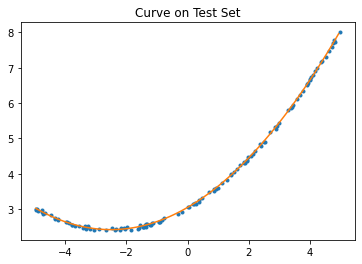

In [13]:
# Part (iii)
x = np.arange(test_x[:,1].min(), test_x[:,1].max(), 0.1)
y = a*x**2 + b*x + c
y_pred = square_model.predict(test_x)

plt.plot(test_x[:,1], test_y, ".")
plt.plot(x, y)
plt.title("Curve on Test Set")

mean_squared_error(y_pred, test_y)


### Answer (iii):
This curve fitse the model a lot better. This is because we take into account the higher polynomial degree, and since it seems the data followed a parabolic curve, taking into account polynomial of degrede 2 helped us match the curve near perfectly. For my run, the MSE was 0.000856 which is much lower than just taking into account degree 1.

4.073831838292883

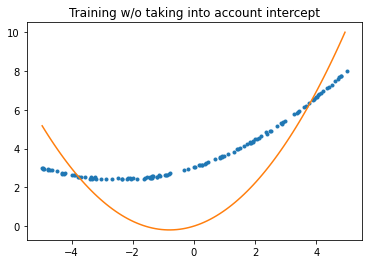

In [14]:
# Part (iv)
# Since I have already charter with intercept above, I shall not do it again. Instead I will do it without intercept here.
squared_wo_intercept = LinearRegression(fit_intercept=False)
squared_wo_intercept.fit(train_x, train_y)
y_pred = squared_wo_intercept.predict(test_x)
a, b = squared_wo_intercept.coef_
x2 = np.arange(test_x[:,1].min(), test_x[:,1].max(), 0.1)
y2 = a*x**2 + b*x
plt.plot(test_x[:,1], test_y, ".")
plt.plot(x2, y2)
plt.title("Training w/o taking into account intercept")
mean_squared_error(y_pred, test_y)

9.273807396159405

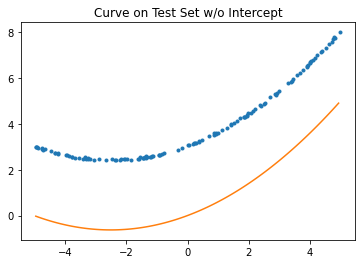

In [15]:
a, b = square_model.coef_ # Using same model as (iii)
x3 = np.arange(test_x[:,1].min(), test_x[:,1].max(), 0.1)
y3 = a*x**2 + b*x
plt.plot(test_x[:,1], test_y, ".")
plt.plot(x3, y3)
plt.title("Curve on Test Set w/o Intercept") # aka a*x**2 + b*x + 0
mean_squared_error(a*test_x[:,1]**2 + b*test_x[:,1], test_y)

### Answer (iv):
The impact of not including it in **making** our regression is that the curve tries to fit at both high points and low points around the points, which makes it overfit. In this example, it can only interpolate and it does it worse than the linear regression. If we do not **include** the intercept when predicting, then the curve will be offset by the intercept and thus will have a corresponding MSE that is approximately the old MSE plus the intercept squared. We need to include the bias which will help us fit the curve exactly.

## Problem 1.3 Kernals-II
So we want to find the distance between two points in the transformed vectors $\Phi(x_i)$ and $\Phi(x_j)$. To calculate, we shall use the 2-norm which is given by:

$d(\Phi(x_i), \Phi(x_j)) = \sqrt{(\Phi(x_i) - \Phi(x_j))^2} = \sqrt{\Phi(x_i)^2 - 2\Phi(x_i)^T\Phi(x_j) + \Phi(x_j)^2}$

As you can see, in order to calculate the distance we need the values $\Phi(x_i)^2$, $\Phi(x_i)^T\Phi(x_j)$, and $\Phi(x_j)^2$. Luckily, we have a matrix $K$ where $K_ij = \Phi(x_i)^T\Phi(x_j)$ so all we need is the values $K_ii$, $K_ij$, and $K_jj$ respectively. Then we can plug in the values into the radicand of the above equation. Thus, Alex is correct.